In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0396d743e31ba3f8ee75ae1e2d476f1


In [5]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 40.24,
  'feels_like': 29.25,
  'temp_min': 39,
  'temp_max': 41,
  'pressure': 1008,
  'humidity': 80},
 'visibility': 16093,
 'wind': {'speed': 13.87, 'deg': 20},
 'rain': {'1h': 0.51},
 'clouds': {'all': 90},
 'dt': 1587250250,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1587203852,
  'sunset': 1587252538},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | joensuu
Processing Record 5 of Set 1 | pacific grove
Processing Record 6 of Set 1 | dawson creek
Processing Record 7 of Set 1 | riyadh
Processing Record 8 of Set 1 | muisne
Processing Record 9 of Set 1 | dunedin
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | tessalit
Processing Record 12 of Set 1 | buala
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | barentu
Processing Record 15 of Set 1 | novokruchininskiy
Processing Record 16 of Set 1 | wanning
Processing Record 17 of Set 1 | nikel
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | bedesa
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | hithadhoo
Processing Rec

Processing Record 37 of Set 4 | port lincoln
Processing Record 38 of Set 4 | ouango
Processing Record 39 of Set 4 | mar del plata
Processing Record 40 of Set 4 | iskateley
Processing Record 41 of Set 4 | zhigansk
Processing Record 42 of Set 4 | hofn
Processing Record 43 of Set 4 | nioro
Processing Record 44 of Set 4 | okandja
City not found. Skipping...
Processing Record 45 of Set 4 | tilichiki
Processing Record 46 of Set 4 | dingle
Processing Record 47 of Set 4 | torbay
Processing Record 48 of Set 4 | lasa
Processing Record 49 of Set 4 | kudahuvadhoo
Processing Record 50 of Set 4 | zabol
Processing Record 1 of Set 5 | pizarro
Processing Record 2 of Set 5 | singkawang
Processing Record 3 of Set 5 | beringovskiy
Processing Record 4 of Set 5 | baculin
Processing Record 5 of Set 5 | koslan
Processing Record 6 of Set 5 | bafoussam
Processing Record 7 of Set 5 | kapaa
Processing Record 8 of Set 5 | tautira
Processing Record 9 of Set 5 | catuday
Processing Record 10 of Set 5 | winburg
Proces

Processing Record 27 of Set 8 | sobolevo
Processing Record 28 of Set 8 | kandla
Processing Record 29 of Set 8 | wattegama
Processing Record 30 of Set 8 | chicama
Processing Record 31 of Set 8 | leshukonskoye
Processing Record 32 of Set 8 | nawa
Processing Record 33 of Set 8 | angoche
Processing Record 34 of Set 8 | esil
Processing Record 35 of Set 8 | livingston
Processing Record 36 of Set 8 | kidal
Processing Record 37 of Set 8 | bara
Processing Record 38 of Set 8 | puerto el triunfo
Processing Record 39 of Set 8 | seoul
Processing Record 40 of Set 8 | mesolongion
City not found. Skipping...
Processing Record 41 of Set 8 | yar-sale
Processing Record 42 of Set 8 | samana
Processing Record 43 of Set 8 | faya
Processing Record 44 of Set 8 | mudyuga
City not found. Skipping...
Processing Record 45 of Set 8 | prachin buri
Processing Record 46 of Set 8 | bereda
Processing Record 47 of Set 8 | troitsk
Processing Record 48 of Set 8 | oranjemund
Processing Record 49 of Set 8 | baglung
Processi

Processing Record 18 of Set 12 | kui buri
Processing Record 19 of Set 12 | cherskiy
Processing Record 20 of Set 12 | vardo
Processing Record 21 of Set 12 | suyan
Processing Record 22 of Set 12 | yunjinghong
City not found. Skipping...
Processing Record 23 of Set 12 | kysyl-syr
Processing Record 24 of Set 12 | buta
Processing Record 25 of Set 12 | ozgon
City not found. Skipping...
Processing Record 26 of Set 12 | medvezhyegorsk
Processing Record 27 of Set 12 | beaufort
Processing Record 28 of Set 12 | port augusta
Processing Record 29 of Set 12 | la ronge
Processing Record 30 of Set 12 | dekalb
Processing Record 31 of Set 12 | dali
Processing Record 32 of Set 12 | manavalakurichi
Processing Record 33 of Set 12 | dabat
Processing Record 34 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 35 of Set 12 | diapaga
Processing Record 36 of Set 12 | inuvik
Processing Record 37 of Set 12 | bishop auckland
Processing Record 38 of Set 12 | muli
Processing Record 39 of Set 12 | s

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,46.99,55,76,11.52,US,2020-04-18 22:54:11
1,Joensuu,62.60,29.76,36.00,74,75,9.17,FI,2020-04-18 22:54:11
2,Pacific Grove,36.62,-121.92,62.60,51,90,10.29,US,2020-04-18 22:54:14
3,Dawson Creek,55.77,-120.24,51.80,25,1,5.82,CA,2020-04-18 22:54:14
4,Riyadh,24.69,46.72,78.80,44,100,4.70,SA,2020-04-18 22:54:15
5,Muisne,0.60,-80.03,75.20,100,75,9.17,EC,2020-04-18 22:54:15
6,Dunedin,-45.87,170.50,59.00,54,72,1.01,NZ,2020-04-18 22:53:05
7,Tessalit,20.20,1.01,83.89,12,4,7.76,ML,2020-04-18 22:50:31
8,Buala,-8.14,159.59,83.89,71,72,2.86,SB,2020-04-18 22:51:09
9,Hobart,-42.88,147.33,48.99,87,75,6.93,AU,2020-04-18 22:49:19


In [11]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2020-04-18 22:54:11,42.60,-73.97,46.99,55,76,11.52
1,Joensuu,FI,2020-04-18 22:54:11,62.60,29.76,36.00,74,75,9.17
2,Pacific Grove,US,2020-04-18 22:54:14,36.62,-121.92,62.60,51,90,10.29
3,Dawson Creek,CA,2020-04-18 22:54:14,55.77,-120.24,51.80,25,1,5.82
4,Riyadh,SA,2020-04-18 22:54:15,24.69,46.72,78.80,44,100,4.70
5,Muisne,EC,2020-04-18 22:54:15,0.60,-80.03,75.20,100,75,9.17
6,Dunedin,NZ,2020-04-18 22:53:05,-45.87,170.50,59.00,54,72,1.01
7,Tessalit,ML,2020-04-18 22:50:31,20.20,1.01,83.89,12,4,7.76
8,Buala,SB,2020-04-18 22:51:09,-8.14,159.59,83.89,71,72,2.86
9,Hobart,AU,2020-04-18 22:49:19,-42.88,147.33,48.99,87,75,6.93


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time

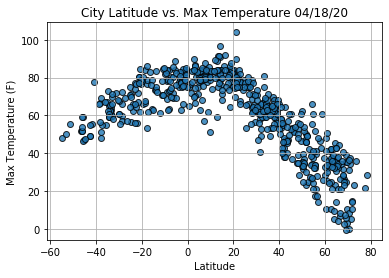

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

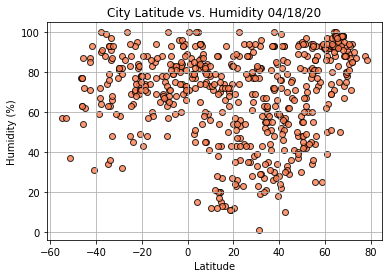

In [17]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o", c="coral",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

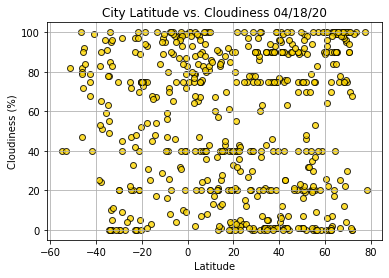

In [20]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", c="gold",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

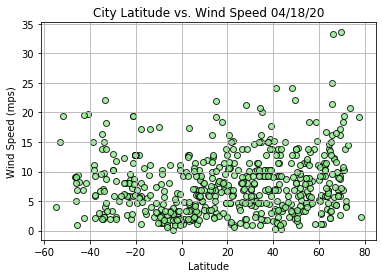

In [21]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", c="lightgreen",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mps)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()